# Job Change of Data Scientists | Data Science Project | EDA

> Data from [Kaggle](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists) with modification in problem context.

*This project was completed as a part of Rakamin Academy Data Science Bootcamp.*

Ascencio, a leading Data Science agency, offers training courses to companies to enhance their employees' skills. Companies want to predict which employees are **unlikely to seek a job change** after completing the course, as well as identify those who are **likely to finish it quickly**. By focusing on employees who are committed to staying and can contribute sooner, Ascencio helps companies optimize their training investments.

To achieve this, Ascencio will build two machine learning models: one to predict the training hours needed for an employee to complete the course, and another to predict whether an employee will seek a job change or not.

# Prepare Everything!

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('matplotlib version : ',mpl.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.2.1
pandas version :  2.2.3
matplotlib version :  3.10.0
seaborn version :  0.13.2


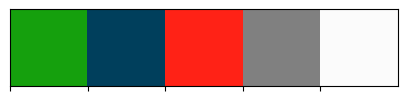

In [2]:
# color palette
green = '#15a00d'
blue = '#003f5c'
red = '#ff2216'
gray = 'gray'
bg_color = '#fbfbfb'
sns.palplot([green,blue,red,gray,bg_color])

In [3]:
# default setting
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.facecolor"] = bg_color
plt.rcParams["axes.facecolor"] = bg_color
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['axes.axisbelow'] = True

In [4]:
# create funcformatter for 1000 to 1k
def thousands_formatter(x, pos):
  if x < 1000:
    return f'{int(x)}'
  else:
    return f'{int(x/1000)}k'
  
# create funcformatter for percentage
def percentage_formatter(x, pos):
  return f'{int(x)}%'

# Exploring the Data!

In [5]:
# read the data
df_train = pd.read_csv(r'Data/aug_train.csv')
df_test = pd.read_csv(r'Data/aug_test.csv')



> **Column List of this Dataset**

1. enrollee_id : Unique ID for employee
2. city: City code of company
3. city_ development _index : Developement index of the city (scaled)
4. gender: Gender of employee
5. relevent_experience: Relevant experience of employee in Data Science
6. enrolled_university: Type of University course enrolled now if any
7. education_level: Education level of employee
8. major_discipline: Education major discipline of employee
9. experience: employee total experience in years
10. company_size: No of employees in current employer's company
11. company_type: Type of current employer's company
12. last_new_job: Difference in years between previous job and current job of employee
13. training_hours: training hours completed
14. target: 0 – Not looking for job change, 1 – Looking for a job change



## General Exploration

### A. Overview Data

In [6]:
# show train data
print("TRAIN DATA")
display(df_train.sample(3))
print(f"Rows numbers: {df_train.shape[0]}")
print(f"Columns numbers: {df_train.shape[1]}")

TRAIN DATA


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
13210,278,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4,94,0.0
2789,3640,city_41,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,18,500-999,Pvt Ltd,>4,26,0.0
12825,33167,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,4,10/49,Pvt Ltd,1,194,1.0


Rows numbers: 19158
Columns numbers: 14


In [7]:
# show test data
print("TEST DATA")
display(df_test.sample(3))
print(f"Rows numbers: {df_test.shape[0]}")
print(f"Columns numbers: {df_test.shape[1]}")

TEST DATA


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
235,24317,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,NaN,NaN,2,12
1387,18581,city_101,0.558,Male,Has relevent experience,no_enrollment,Masters,STEM,15,100-500,Pvt Ltd,4,20
2080,20348,city_150,0.698,Male,Has relevent experience,no_enrollment,Masters,STEM,8,50-99,Public Sector,1,37


Rows numbers: 2129
Columns numbers: 13


In [8]:
# show the difference of columns in both data
col_train = df_train.columns.tolist()
col_test = df_test.columns.tolist()
col_diff = list(set(col_train) - set(col_test))
print(f"1. Test Data doesn't have {col_diff} column, while Train Data have")

# show the percentage difference of data size
size_diff = df_test.shape[0]/df_train.shape[0]*100
print(f"2. Test Data size only have about {np.round(size_diff,2)}% of Train Data size")

# show if test data is part of train data
part_or_not = df_train[df_train.enrollee_id.isin(df_test.enrollee_id)]
print(f"3. Test Data is part of Train Data: {not part_or_not.empty}")

1. Test Data doesn't have ['target'] column, while Train Data have
2. Test Data size only have about 11.11% of Train Data size
3. Test Data is part of Train Data: False


Notes:<br>Since Test Data doesn't have 'target' column and only about 11.11% of Train Data size, we will only explore Train Data for efficiency.

### B. Type Data

In [9]:
# check data type
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Notes:<br>
1. 'enrollee_id' column should have string type
2. 'target' column should have boolean type.
3. All categorical columns should be in categorical type with manual sorting so memory usage will more efficient and it is easier to label encoding.

In [10]:
# change it to str and bool for convenience now
df_train['enrollee_id'] = df_train['enrollee_id'].astype(str)
df_train['target'] = df_train['target'].astype(bool)

# verify the changes
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  object 
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  bool   
dtypes: bool(1), float64(1), int64(1), obje

In [11]:
# divide categorical and numerical columns
cats = df_train.select_dtypes(include=['object','bool']).columns.tolist()
nums = df_train.select_dtypes(exclude=['object','bool']).columns.tolist()

print(f"Categorical Columns: {cats}")
print(f"Numerical Columns: {nums}")

Categorical Columns: ['enrollee_id', 'city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'target']
Numerical Columns: ['city_development_index', 'training_hours']


### C. Describe Data

In [12]:
# describe categorical data
display(df_train[cats].describe())

,enrollee_id,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
count,19158,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158
unique,19158,123,3,2,3,5,6,22,8,6,6,2
top,23834,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,False
freq,1,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040,14381


Notes:<br>
1. 'enrollee_id' have distinct value. It shows that this column is primary key. We will drop this column in data preprocessing.
2. Based on freq/count, we can see many columns have imbalance data. We need to do grouping in data preprocessing later.
3. This dataset have many missing values, we need to explore it too.

In [13]:
# describe numerical data
display(df_train[nums].describe())

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


Notes:
1. There are no missing data in numerical columns
2. There are differences between mean and median in both numerical columns, we may excpect to not see normal distribution
3. In 'city_development_index' based on quartile value, we can see outlier in left side/negative side since min value is much lower than mean based on std difference
4. In 'training_hours' based on quartile value, we can see outlier in right side/positive side since max value is much higher than mean based on std difference

### D. Duplicate Data

In [14]:
# check duplicate data
dup_perc = df_train.duplicated().sum()/df_train.shape[0]*100
print(f"Duplicate Rows: {df_train.duplicated().sum()} row")

Duplicate Rows: 0 row


Notes:
1. Hooray!

### E. Missing Value

In [15]:
# check missing value
miss_perc = df_train.isna().sum()/df_train.shape[0]*100
miss = pd.DataFrame({'Missing Count': df_train.isna().sum(),
                     'Missing %': np.round(miss_perc,2)}).sort_values('Missing %', ascending=False)
display(miss)

# check how many rows will be delete if we using dropna
rows_if_dropna = df_train.dropna()
print(f"Rows will be delete if we using dropna is {rows_if_dropna.shape[0]} rows or {np.round(100 - rows_if_dropna.shape[0]/df_train.shape[0]*100,2)}% of total train data")

,Missing Count,Missing %
company_type,6140,32.05
company_size,5938,30.99
gender,4508,23.53
major_discipline,2813,14.68
education_level,460,2.40
last_new_job,423,2.21
enrolled_university,386,2.01
experience,65,0.34
enrollee_id,0,0.00
city,0,0.00


Rows will be delete if we using dropna is 8955 rows or 53.26% of total train data


In [16]:
# check rows with equal or more than 4 NaN values train data
rows_with_many_nulls = df_train[df_train.isnull().sum(axis=1) >= 4]
display(rows_with_many_nulls.sample(3))
print(f"Rows with equal or more than 4 NaN value is {rows_with_many_nulls.shape[0]} rows or {np.round(rows_with_many_nulls.shape[0]/df_train.shape[0]*100,2)}% of total train data")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2329,17778,city_74,0.579,NaN,Has relevent experience,no_enrollment,High School,NaN,<1,NaN,NaN,never,160,True
7833,13322,city_103,0.920,NaN,No relevent experience,no_enrollment,NaN,NaN,2,NaN,NaN,never,42,False
1434,11823,city_134,0.698,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,37,False


Rows with equal or more than 4 NaN value is 878 rows or 4.58% of total train data


Since we will imputate test data too, we need to check rows with equal or more than 4 NaN values in test data

In [17]:
# check rows with equal or more than 4 NaN values in test data
rows_with_many_nulls = df_test[df_test.isnull().sum(axis=1) >= 4]
display(rows_with_many_nulls.sample(3))
print(f"Rows with equal or more than 4 NaN value is {rows_with_many_nulls.shape[0]} rows or {np.round(rows_with_many_nulls.shape[0]/df_test.shape[0]*100,2)}% of total test data")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
125,4417,city_103,0.920,NaN,No relevent experience,no_enrollment,NaN,NaN,NaN,NaN,NaN,NaN,99
242,15221,city_114,0.926,Male,Has relevent experience,no_enrollment,NaN,NaN,2,NaN,NaN,never,10
660,16104,city_103,0.920,NaN,No relevent experience,no_enrollment,High School,NaN,<1,NaN,NaN,never,44


Rows with equal or more than 4 NaN value is 85 rows or 3.99% of total test data


Notes:
1. There are so many (>50% total train data) that have rows with missing value. We cannot drop it since it will delete more than half of our data.
2. We will imputation data using LGBM Clasifier for categorical column and LGBM Regresion for numerical column
3. Before we imputate data with ML model, we will see in next section if major_discipline with NaN value can be replace with 'No Major' if education_level is below Graduate
4. We will drop rows with equal or more than 4 null values since it have little proportion with total train data or test data (<5% total data). It will make ML model have better features for imputate missing value.

### F. Value Count

In [18]:
# categorical value count
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df_train[col].value_counts())
    print()

Value count kolom enrollee_id:
enrollee_id
23834    1
8949     1
29725    1
11561    1
33241    1
        ..
29452    1
699      1
27107    1
402      1
28806    1
Name: count, Length: 19158, dtype: int64

Value count kolom city:
city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_129       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

Value count kolom gender:
gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

Value count kolom relevent_experience:
relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

Value count kolom enrolled_university:
enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

Value count kolom education_level:
education_level
Graduate          11598
Masters            4361
High School    

Notes:
1. enrolle_id will be drop since it just unique identifiers.
2. city will be drop since it has too many unique values (123 values). Moreover, city_development_index can convey more necessary information than city.
3. We will change relevent_experience to relevant_experience and change dtype to boolean (True, False)
3. We can grouping major_discipline value to STEM, Non-STEM, and No Major
4. We can grouping experience to Early Career (<1-4 years), Mid Career (5-10 years), Senior Career (11-15 years), and High Experience (>15 Years)
5. We can grouping company_size to Small Company (<100), Medium Company (100-999), Large Company (1000-9999), and Very Large Company (>10000)
6. We will use One-Hot Encoding for gender (2 features), major_discipline (2 features), and company_type (5 features). We just using n-1 unique value of each feature to avoid multicollinearity.
7. We will use Label Endoding for relevent_experience, enrolled_university, education_level, experience, company_size, and last_new_job (6 features)
8. We will get 2+2+5+6 = 15 categorical features for ML model.

In [19]:
# numerical value count
for col in nums:
    print(f'''Value count kolom {col}:''')
    print(df_train[col].value_counts())
    print()

Value count kolom city_development_index:
city_development_index
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: count, Length: 93, dtype: int64

Value count kolom training_hours:
training_hours
28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: count, Length: 241, dtype: int64



Notes:
1. We will have 1 numerical features if we want predict training_hours and we will have 2 numerical features if we want predict target
2. Total we have 16-17 features to play along

### Additional

From this dataset, logically, we can think about correlation between education_level and major_discipline:
1. If education_level is below Graduate, then there is No Major in major_discipline
2. If education_level is over High School, then there is ***no*** of No Major in major_discipline

We need to check this!

In [20]:
# check if education_level below Graduate have No Major in major_discipline
sum_na_below_grad = df_train[df_train['education_level'].isin(['High School','Primary School'])]['major_discipline'].isna().sum()
total_below_grad = df_train[df_train['education_level'].isin(['High School','Primary School'])].shape[0]
print(f"NaN values in major_discipline of employee with education_level below Graduate is {sum_na_below_grad} values or {sum_na_below_grad/total_below_grad*100}%")

NaN values in major_discipline of employee with education_level below Graduate is 2325 values or 100.0%


This is correct! <br>If education_level is below Graduate, then there is No Major in major_discipline

In [21]:
# check if education_level over High School have No Major in major_discipline
sum_no_major_over_hs = df_train[(df_train['education_level'].isin(['Graduate','Masters','Phd']) & (df_train['major_discipline'] == 'No Major'))]['major_discipline'].count()
total_over_hs = df_train[(df_train['education_level'].isin(['Graduate','Masters','Phd']))].shape[0]
print(f"No Major in major_discipline of employee with education_level over High School is {sum_no_major_over_hs} values or {np.round(sum_no_major_over_hs/total_over_hs*100,2)}%")

No Major in major_discipline of employee with education_level over High School is 223 values or 1.36%


This is wrong!
<br>If the education level is above High School, then it doesn't make sense to have No Major in major_discipline. It shows that this discrepancy likely indicates incorrect or inconsistent data. To address this, we will replace the "No Major" entries with NaN values, allowing us to impute the missing information using ML model later. However, before proceeding, we need to assess whether this adjustment will impact our previous analysis.

In [22]:
# check if we change it major_discipline to NaN Values because we need to imputate it with ML
# do this will change analysis above?
df_exp = df_train.copy() # make a copy so original train data is not affected
print(f"Rows of education_level over High School with NaN Value before change: {df_exp.loc[(df_exp['education_level'].isin(['Graduate','Masters','Phd'])), 'major_discipline'].isna().sum()} rows")
df_exp.loc[(df_exp['education_level'].isin(['Graduate','Masters','Phd']) & (df_exp['major_discipline'] == 'No Major')), 'major_discipline'] = np.nan
print(f"Rows of education_level over High School with NaN Value after change: {df_exp.loc[(df_exp['education_level'].isin(['Graduate','Masters','Phd'])), 'major_discipline'].isna().sum()} rows")

print("")

# check rows with equal or more than 4 NaN values
rows_with_many_nulls_exp = df_exp[df_exp.isnull().sum(axis=1) >= 4]
print(f"Rows with equal pr more than 4 NaN value before change is {rows_with_many_nulls.shape[0]} rows or {np.round(rows_with_many_nulls.shape[0]/df_train.shape[0]*100,2)}% of total train data")
print(f"Rows with equal or more than 4 NaN value after change is {rows_with_many_nulls_exp.shape[0]} rows or {np.round(rows_with_many_nulls_exp.shape[0]/df_exp.shape[0]*100,2)}% of total train data")

Rows of education_level over High School with NaN Value before change: 28 rows
Rows of education_level over High School with NaN Value after change: 251 rows

Rows with equal pr more than 4 NaN value before change is 85 rows or 0.44% of total train data
Rows with equal or more than 4 NaN value after change is 893 rows or 4.66% of total train data


As shown above, rows with equal or more than 4 NaN values can still be drop since it have little proportion to total data (<5% total data) so this change is not alter our previous analysis

## Univariate Analysis


### A. Numerical Columns

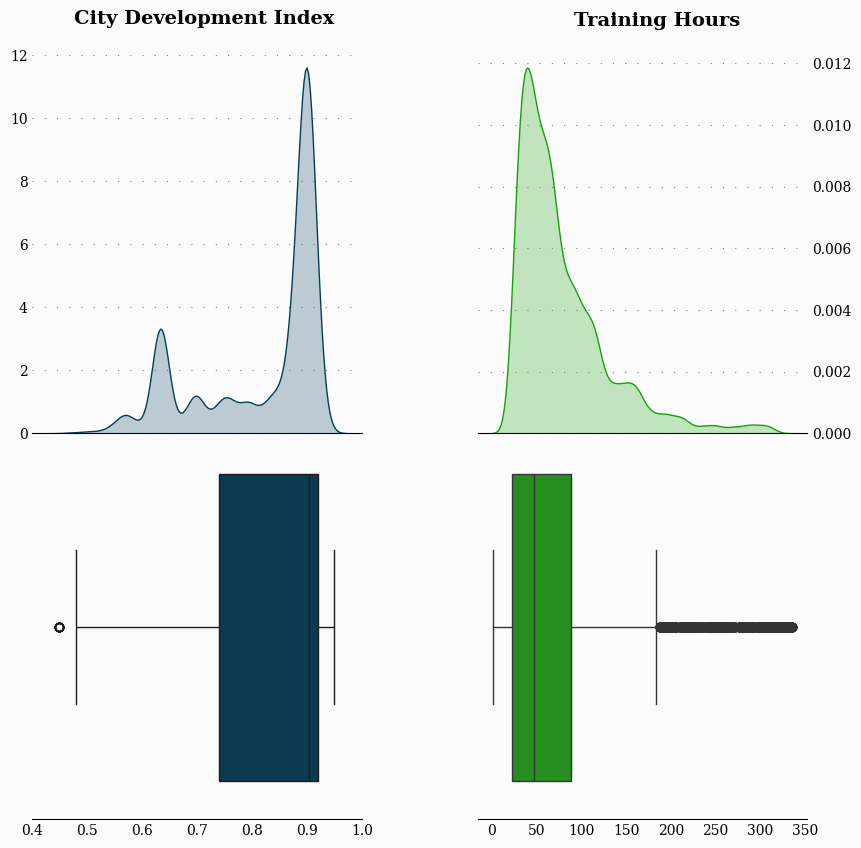

In [23]:
# KDE Plot and Boxplot for numerical columns
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.35, hspace=0.005)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# ax0 - KDE Plot - CDI
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax0.text(0.45, 13, 'City Development Index', size=14, weight='bold')
sns.kdeplot(df_train[nums[0]], ax=ax0, color=blue, shade=True)

ax0.set_xticks([])
ax0.set_ylabel('')
ax0.set_xlabel('')

# ax1 - KDE Plot - Training Hours
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax1.text(80, 0.0132, 'Training Hours', size=14, weight='bold')
sns.kdeplot(df_train[nums[1]], ax=ax1, color=green, shade=True)

ax1.yaxis.tick_right()
ax1.set_xticks([])
ax1.set_ylabel('')
ax1.set_xlabel('')

# ax2 - Box Plot - CDI
sns.boxplot(x=df_train[nums[0]], ax=ax2, color=blue)

ax2.xaxis.set_major_locator(mtick.MultipleLocator(0.1))
ax2.set_xlim(0.4,1)
ax2.set_ylabel('')
ax2.set_xlabel('')

# ax3 - Box Plot - Training Hours
sns.boxplot(x=df_train[nums[1]], ax=ax3, color=green)

ax3.xaxis.set_major_locator(mtick.MultipleLocator(50))
ax3.set_ylabel('')
ax3.set_xlabel('')

plt.show()

Notes:
1. city_development_index have multimodal distribution, it may need grouping from 0.4 to 1.0 by interval 0.1.
2. Only one outlier detected by IQR in city_development_index, we can easily drop it
2. training_hours have positively-skewed distribution, we can use log-transformation for feature transformation
3. There are so many outlier in training_hours, we need to check it further after apply log-transformation

Text(0.5, 0, '')

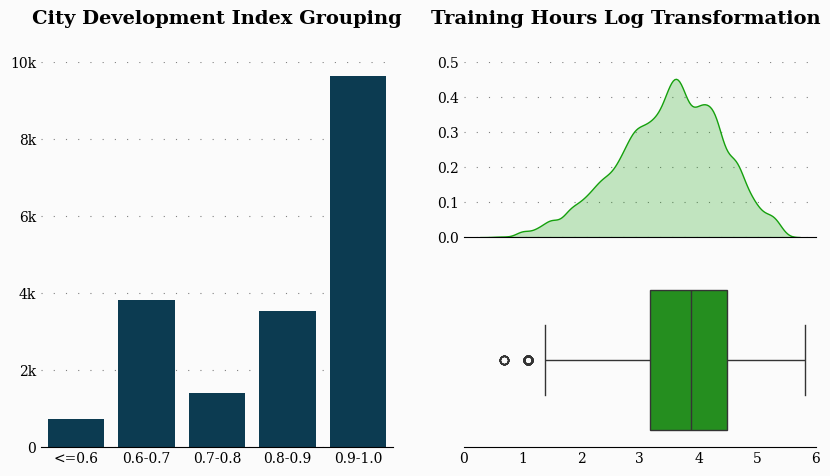

In [24]:
# show plot if City Development index is grouping and Training Hours is log-transformation
fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(2,2)
# gs.update(wspace=0.35, hspace=0.5)

ax0 = fig.add_subplot(gs[:, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])

# ax0 - CDI Grouping
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax0.text(2, 11000, 'City Development Index Grouping', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[nums[0]].apply(lambda x: '<=0.6' if x <= 0.6
                             else '0.6-0.7' if x <= 0.7
                             else '0.7-0.8' if x <= 0.8
                             else '0.8-0.9' if x <= 0.9
                             else np.nan if pd.isna(x)
                             else '0.9-1.0')
sns.countplot(x=df, ax=ax0, palette=[blue], order = ['<=0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1.0'])

ax0.yaxis.set_major_locator(mtick.MultipleLocator(2000))
ax0.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax0.set_ylabel('')
ax0.set_xlabel('')
ax0.set_ylim(0,10000)

# ax1 - Training Hours Log Transformation
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax1.text(3, 0.61, 'Training Hours Log Transformation', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[nums[1]].apply(lambda x: np.log1p(x)) # log1p to avoid log(0)
sns.kdeplot(df, ax=ax1, color=green, shade=True)

ax1.set_xticks([])
ax1.yaxis.set_major_locator(mtick.MultipleLocator(0.1))
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylim(0,0.5)

# ax3 - Box Plot - Training Hours Log Transformation
df = df_train[nums[1]].apply(lambda x: np.log1p(x)) # log1p to avoid log(0)
sns.boxplot(x=df, ax=ax2, color=green)

ax2.set_xlim(0,6)
ax2.set_ylabel('')
ax2.set_xlabel('')

Notes:
1. It is better to using grouping in city_development_index since it have multimodal distribution. Each 'modal' may have some different characteristics with each other. We will using Label Encoding for this.
2. training_hours give approximately normal distribution after log transformation. We need to use this transformation.
3. Remove outliers from training_hours using IQR method.


### B. Categorical Columns

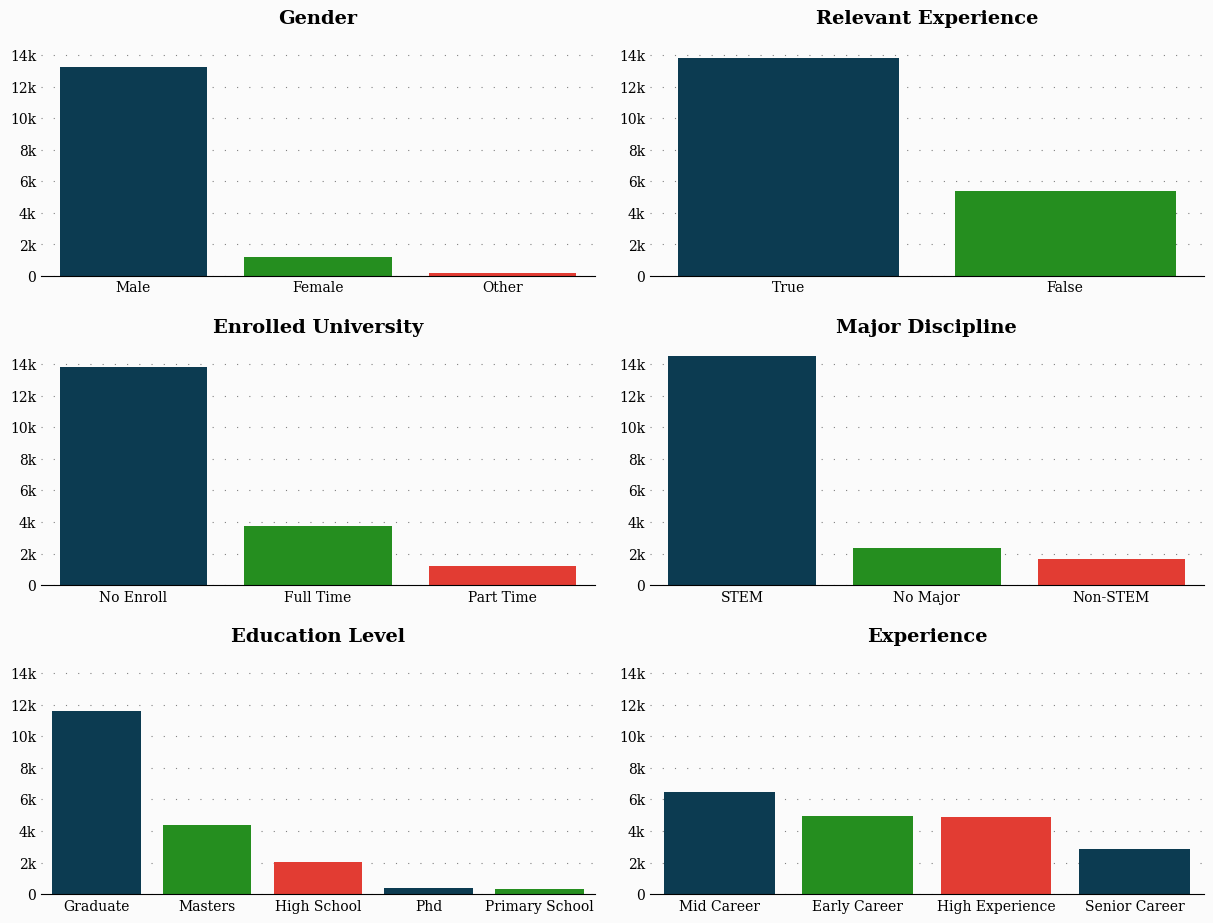

In [25]:
# make new categorical column to visualize, we don't check column that we don't use later
cats2 = cats[2:].copy() # drop enrollee_id and city

# Count Plot for categorical columns
fig = plt.figure(figsize=(15,11))
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.1, hspace=0.35)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# ax0 - Count Plot - Gender
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax0.text(1, 16000, 'Gender', size=14, weight='bold', horizontalalignment = 'center')
sns.countplot(x=df_train[cats2[0]], ax=ax0, palette=[blue,green,red])

ax0.yaxis.set_major_locator(mtick.MultipleLocator(2000))
ax0.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax0.set_ylabel('')
ax0.set_xlabel('')
ax0.set_ylim(0,14500)

# ax1 - Count Plot - Relevent Experience
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax1.text(0.5, 16000, 'Relevant Experience', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[1]].apply(lambda x: True if x == "Has relevent experience" 
                              else np.nan if pd.isna(x) else False)
sns.countplot(x=df, ax=ax1, palette=[blue,green,red], order=df.value_counts().index)

ax1.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylim(0,14500)

# ax2 - Count Plot - Enrolled University
ax2.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax2.text(1, 16000, 'Enrolled University', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[2]].apply(lambda x: "No Enroll" if x == "no_enrollment"
                              else "Full Time" if x == "Full time course" 
                              else np.nan if pd.isna(x) else "Part Time")
sns.countplot(x=df, ax=ax2, palette=[blue,green,red], order=df.value_counts().index)

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylim(0,14500)

# ax3 - Count Plot - Major Discipline
ax3.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax3.text(1, 16000, 'Major Discipline', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[3:5]]
df[cats2[4]] = df_train[cats2[4]].apply(lambda x: "STEM" if x == "STEM"
                              else "No Major" if x == "No Major" 
                              else np.nan if pd.isna(x) else "Non-STEM")
df[cats2[4]] = np.where((df[cats2[3]].isin(['Graduate', 'Masters'])) & (df[cats2[4]] == 'No Major'), np.nan, 
                        np.where((df[cats2[3]].isin(['Primary School', 'High School'])) & (df[cats2[4]].isnull()),'No Major',df[cats2[4]]))
df = df[cats2[4]]
sns.countplot(x=df, ax=ax3, palette=[blue,green,red], order=df.value_counts().index)

ax3.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.set_ylim(0,14500)

# ax4 - Count Plot - Education Level
ax4.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax4.text(2, 16000, 'Education Level', size=14, weight='bold', horizontalalignment = 'center')
sns.countplot(x=df_train[cats2[3]], ax=ax4, palette=[blue,green,red], order=df_train[cats2[3]].value_counts().index)

ax4.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.set_ylim(0,14500)

# ax5 - Count Plot - Experience
ax5.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax5.text(1.5, 16000, 'Experience', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[5]].apply(lambda x: "Early Career" if x in ['<1','1','2','3','4']
                              else "Mid Career" if x in ['5','6','7','8','9','10']
                              else "Senior Career" if x in ['11','12','13','14','15']
                              else np.nan if pd.isna(x) else "High Experience")
sns.countplot(x=df, ax=ax5, palette=[blue,green,red], order=df.value_counts().index)

ax5.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax5.set_ylabel('')
ax5.set_xlabel('')
ax5.set_ylim(0,14500)

plt.show()

Notes:
1. gender, enrolled_university, and major_discipline have imbalance dataset.
2. major_discipline has been imputate using basic logic (check General Exploration > Additional).
3. Grouping experience make it more balance.
4. We can see that many participants have relevant experience in data science before, have math or programming foundation in STEM, or have major as graduate and above.
5. Many participants have no enrolled university so they can focus more in courses than split their focus to another education.
6. We can see many participants have mid or early career in experience, it makes sense since this stage is where people consider to improve quality and company want atleast their employee have experience.
7. Male participants is biggest value in gender.

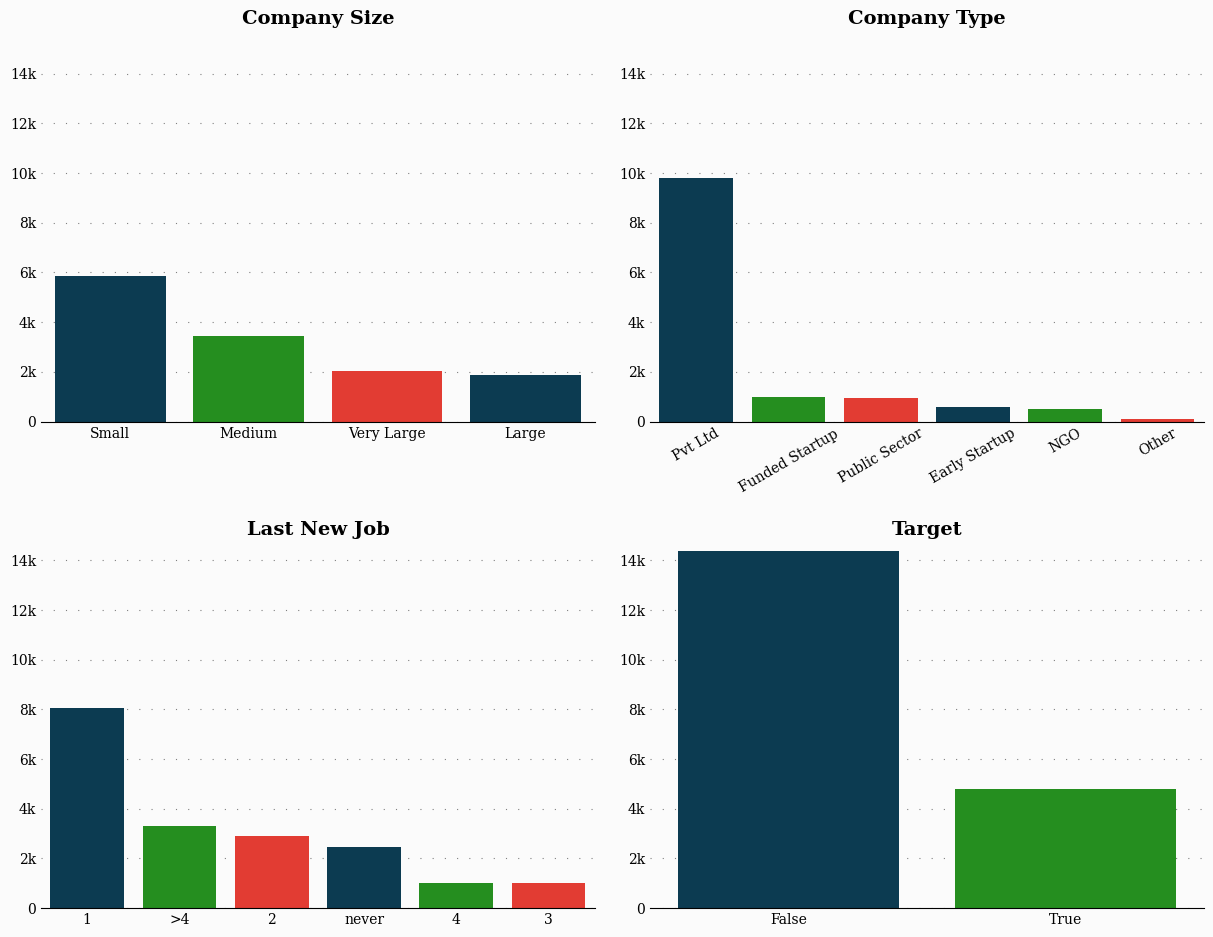

In [26]:
# Count Plot for categorical columns
fig = plt.figure(figsize=(15,11))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.1, hspace=0.35)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# ax0 - Count Plot - Company Size
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax0.text(1.5, 16000, 'Company Size', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[6]].apply(lambda x: "Medium" if x in ['100-500', '500-999']
                              else "Large" if x in ['1000-4999', '5000-9999']
                              else "Very Large" if x in ['10000+'] 
                              else np.nan if pd.isna(x) else "Small")
sns.countplot(x=df, ax=ax0, palette=[blue,green,red], order=df.value_counts().index)

ax0.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax0.set_ylabel('')
ax0.set_xlabel('')
ax0.set_ylim(0,14500)

# ax1 - Count Plot - Company Type
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax1.text(2.5, 16000, 'Company Type', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[7]].apply(lambda x: "Early Startup" if x == "Early Stage Startup" else x)
sns.countplot(x=df, ax=ax1, palette=[blue,green,red], order=df.value_counts().index)

ax1.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylim(0,14500)
ax1.set_xticklabels(labels=df.value_counts().index ,rotation=30)

# ax2 - Count Plot - Last New Job
ax2.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax2.text(2.5, 15000, 'Last New Job', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[8]]
sns.countplot(x=df, ax=ax2, palette=[blue,green,red], order=df.value_counts().index)

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylim(0,14500)

# ax3 - Count Plot - Target
ax3.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
ax3.text(0.5, 15000, 'Target', size=14, weight='bold', horizontalalignment = 'center')
df = df_train[cats2[9]]
sns.countplot(x=df, ax=ax3, palette=[blue,green,red], order=df.value_counts().index)

ax3.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.set_ylim(0,14500)

plt.show()

Notes:
1. Largest participants in company_size is small. This makes sense since company want to get bigger by attend their employee to data science courses.
2. Private limited company is the biggest in company_type. They have more resource to supply their employee for improving quality using data science courses.
3. Last new job in 1 years is the highest value. Are this company want their new employee to get started with new knowledge? In other hand, senior employee is also in number two, are this company wanna put resource on their 'loyal' employee?
4. Good news is more participants not leave their company after courses. Yet, it makes imbalance dataset and we need to solve it using SMOTE.

## Multivariate Analysis

Only for convenience, we will rename, grouping, and little imputation (based on General Exploration > Additional) so we will have better plot.</br>
We will also divide column features to two categories: features from company (external) and from employee (internal)

In [27]:
# copy to df
df = df_train.copy()

# rename relevent_experience to relevant_experience
df.rename(columns={'relevent_experience':'relevant_experience'}, inplace=True)

# grouping city_development_index
df['city_development_index'] = df['city_development_index'].apply(lambda x: '<=0.6' if x <= 0.6
                                                                                else '0.6-0.7' if x <= 0.7
                                                                                else '0.7-0.8' if x <= 0.8
                                                                                else '0.8-0.9' if x <= 0.9
                                                                                else np.nan if pd.isna(x)
                                                                                else '0.9-1.0')

# grouping relevant_experience
df['relevant_experience'] = df['relevant_experience'].apply(lambda x: True if x == "Has relevent experience" 
                                                 else np.nan if pd.isna(x) else False)
df['relevant_experience'] = df['relevant_experience'].astype(str)

# grouping enrolled_university
df['enrolled_university'] = df['enrolled_university'].apply(lambda x: "No Enroll" if x == "no_enrollment"
                                                                        else "Full Time" if x == "Full time course" 
                                                                        else np.nan if pd.isna(x) else "Part Time")

# grouping and imputation major_discipline
df['major_discipline'] = df['major_discipline'].apply(lambda x: "STEM" if x == "STEM"
                              else "No Major" if x == "No Major" 
                              else np.nan if pd.isna(x) else "Non-STEM")
df['major_discipline'] = np.where((df['education_level'].isin(['Graduate', 'Masters'])) & (df['major_discipline'] == 'No Major'), np.nan, 
                        np.where((df['education_level'].isin(['Primary School', 'High School'])) & (df['major_discipline'].isnull()),'No Major',df['major_discipline']))

# grouping experience
df['experience'] = df['experience'].apply(lambda x: "Early Career" if x in ['<1','1','2','3','4']
                                                        else "Mid Career" if x in ['5','6','7','8','9','10']
                                                        else "Senior Career" if x in ['11','12','13','14','15']
                                                        else np.nan if pd.isna(x) else "High Experience")

# grouping company_size
df['company_size'] = df['company_size'].apply(lambda x: "Medium" if x in ['100-500', '500-999']
                                                            else "Large" if x in ['1000-4999', '5000-9999']
                                                            else "Very Large" if x in ['10000+'] 
                                                            else np.nan if pd.isna(x) else "Small")

# rename company_type
df['company_type'] = df['company_type'].apply(lambda x: "Early Startup" if x == "Early Stage Startup" else x)

# check data
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
14465,17407,city_103,0.9-1.0,Female,False,No Enroll,Phd,Non-STEM,High Experience,Very Large,Public Sector,>4,17,False
11347,4603,city_21,0.6-0.7,Male,False,Full Time,High School,No Major,Early Career,NaN,NaN,never,112,True
15824,3525,city_103,0.9-1.0,Female,True,No Enroll,Graduate,Non-STEM,High Experience,NaN,NaN,1,68,True
10597,28725,city_16,0.9-1.0,Male,True,No Enroll,Graduate,STEM,High Experience,NaN,NaN,1,19,False
1225,12225,city_94,0.6-0.7,Male,True,No Enroll,Masters,STEM,Senior Career,Small,Pvt Ltd,1,36,False


In [28]:
# divide columns feature that is external of employee and internal of employee
external = ['city_development_index','company_size','company_type'] # external of employee
internal = ['gender','relevant_experience','enrolled_university','education_level','major_discipline','experience','last_new_job'] # internal of employee

### Target

#### External Features Plot

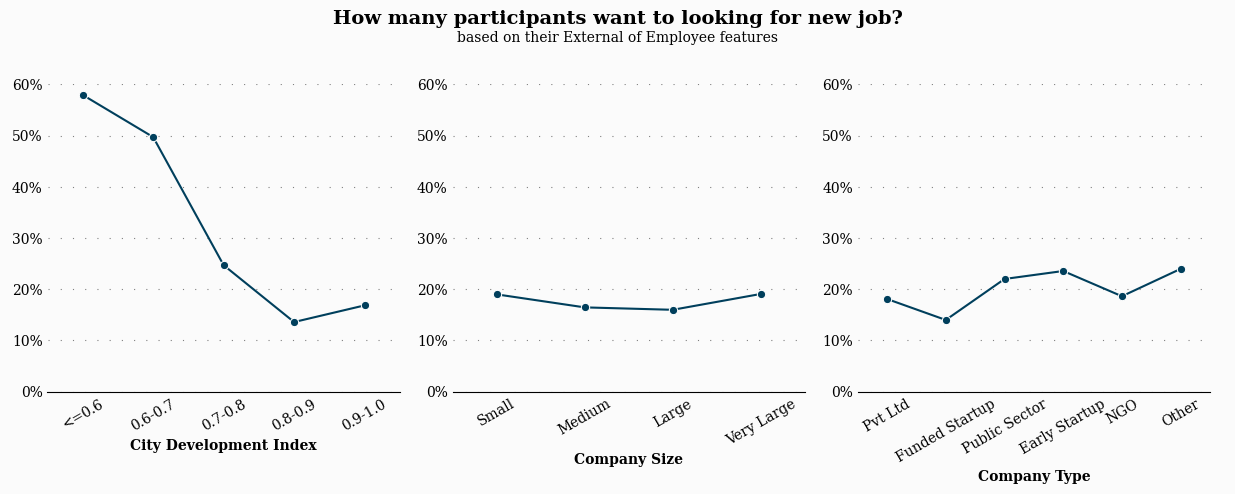

In [29]:
# lineplot for external of employee
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.15, hspace=0.005)

axtext = fig.add_subplot(gs[0, :])
ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[1, 2])

# ax0 - City Development Index
dfp = df[[external[0],'target']].pivot_table(index=external[0], columns='target', aggfunc=len).reset_index().rename(columns={0:'Not Looking for Job Change', 1:'Looking for Job Change'})
dfp['Total'] = dfp['Looking for Job Change'] + dfp['Not Looking for Job Change']
dfp['Looking for Job Change Percentage'] = dfp['Looking for Job Change'] / dfp['Total'] * 100
dfp = dfp.set_index(external[0]).loc[['<=0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1.0']].reset_index()

ax0 = sns.lineplot(data=dfp, x=external[0], y='Looking for Job Change Percentage', marker='o', color=blue, ax=ax0)
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax0.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax0.set_xlabel('City Development Index', size=10, weight='bold')
ax0.set_ylabel('')
ax0.set_ylim(0,60)
ax0.set_xlim(-0.5,4.5)
ax0.set_xticklabels(labels=dfp[external[0]].unique() ,rotation=30)

# ax1 - Company Size
dfp = df[[external[1],'target']].pivot_table(index=external[1], columns='target', aggfunc=len).reset_index().rename(columns={0:'Not Looking for Job Change', 1:'Looking for Job Change'})
dfp['Total'] = dfp['Looking for Job Change'] + dfp['Not Looking for Job Change']
dfp['Looking for Job Change Percentage'] = dfp['Looking for Job Change'] / dfp['Total'] * 100
dfp = dfp.set_index(external[1]).loc[['Small','Medium','Large','Very Large']].reset_index()

ax1 = sns.lineplot(data=dfp, x=external[1], y='Looking for Job Change Percentage', marker='o', color=blue, ax=ax1)
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax1.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax1.set_xlabel('Company Size', size=10, weight='bold')
ax1.set_ylabel('')
ax1.set_ylim(0,60)
ax1.set_xlim(-0.5,3.5)
ax1.set_xticklabels(labels=dfp[external[1]].unique() ,rotation=30)

# ax2 - Company Type
dfp = df[[external[2],'target']].pivot_table(index=external[2], columns='target', aggfunc=len).reset_index().rename(columns={0:'Not Looking for Job Change', 1:'Looking for Job Change'})
dfp['Total'] = dfp['Looking for Job Change'] + dfp['Not Looking for Job Change']
dfp['Looking for Job Change Percentage'] = dfp['Looking for Job Change'] / dfp['Total'] * 100
dfp = dfp.set_index(external[2]).loc[['Pvt Ltd','Funded Startup','Public Sector','Early Startup','NGO','Other']].reset_index()

ax2 = sns.lineplot(data=dfp, x=external[2], y='Looking for Job Change Percentage', marker='o', color=blue, ax=ax2)
ax2.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax2.set_xlabel('Company Type', size=10, weight='bold')
ax2.set_ylabel('')
ax2.set_ylim(0,60)
ax2.set_xlim(-0.5,5.5)
ax2.set_xticklabels(labels=dfp[external[2]].unique() ,rotation=30)

# axtext - Title
axtext.text(0.5, 1, 'How many participants want to looking for new job?', size=14, weight='bold', horizontalalignment = 'center')
axtext.text(0.5, 0.77, 'based on their External of Employee features', size=10, horizontalalignment = 'center')
axtext.axis('off')
axtext.set_position([0.1, 0.47, 0.81, 0.1])


Notes:</br>
1. People in worse city (lower city development index) tend to leave company after courses. It makes sense since people wanna get better life for working.
2. There is no visible correlation between company_size or company_type with target. We can leave it for now.

#### Internal Features Plot

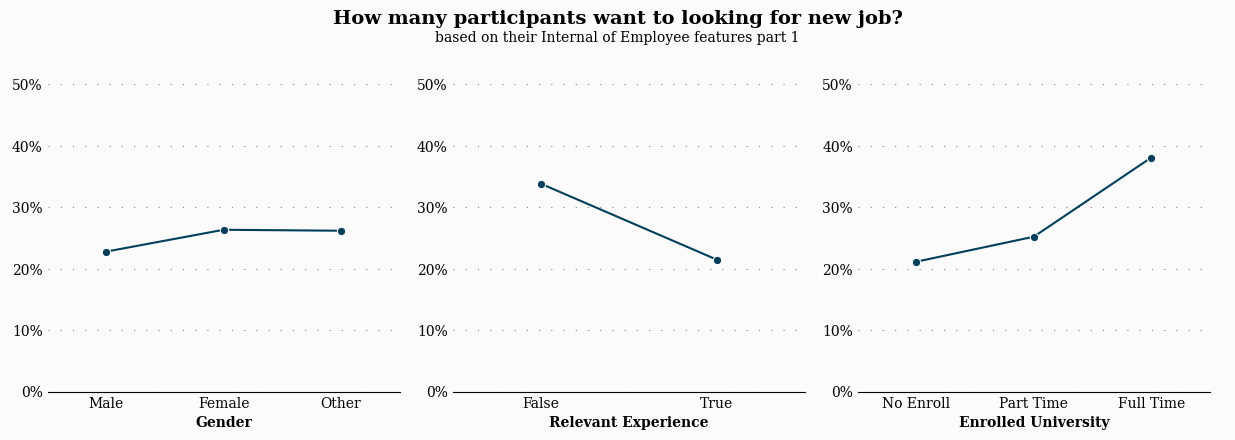

In [30]:
# lineplot for internal of employee part 1
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.15, hspace=0.005)

axtext = fig.add_subplot(gs[0, :])
ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[1, 2])

# ax0 - Gender
dfp = df[[internal[0],'target']].pivot_table(index=internal[0], columns='target', aggfunc=len).reset_index().rename(columns={0:'Not Looking for Job Change', 1:'Looking for Job Change'})
dfp['Total'] = dfp['Looking for Job Change'] + dfp['Not Looking for Job Change']
dfp['Looking for Job Change Percentage'] = dfp['Looking for Job Change'] / dfp['Total'] * 100
dfp = dfp.set_index(internal[0]).loc[['Male','Female','Other']].reset_index()

ax0 = sns.lineplot(data=dfp, x=internal[0], y='Looking for Job Change Percentage', marker='o', color=blue, ax=ax0)
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax0.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax0.set_xlabel('Gender', size=10, weight='bold')
ax0.set_ylabel('')
ax0.set_ylim(0,50)
ax0.set_xlim(-0.5,2.5)

# ax1 - Relevant Experience
dfp = df[[internal[1],'target']].pivot_table(index=internal[1], columns='target', aggfunc=len).reset_index().rename(columns={0:'Not Looking for Job Change', 1:'Looking for Job Change'})
dfp['Total'] = dfp['Looking for Job Change'] + dfp['Not Looking for Job Change']
dfp['Looking for Job Change Percentage'] = dfp['Looking for Job Change'] / dfp['Total'] * 100
# dfp = dfp.set_index(internal[1]).loc[[True,False]].reset_index()

ax1 = sns.lineplot(data=dfp, x=internal[1], y='Looking for Job Change Percentage', marker='o', color=blue, ax=ax1)
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax1.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax1.set_xlabel('Relevant Experience', size=10, weight='bold')
ax1.set_ylabel('')
ax1.set_ylim(0,50)
ax1.set_xlim(-0.5,1.5)

# ax2 - Enrolled University
dfp = df[[internal[2],'target']].pivot_table(index=internal[2], columns='target', aggfunc=len).reset_index().rename(columns={0:'Not Looking for Job Change', 1:'Looking for Job Change'})
dfp['Total'] = dfp['Looking for Job Change'] + dfp['Not Looking for Job Change']
dfp['Looking for Job Change Percentage'] = dfp['Looking for Job Change'] / dfp['Total'] * 100
dfp = dfp.set_index(internal[2]).loc[['No Enroll','Part Time','Full Time']].reset_index()

ax2 = sns.lineplot(data=dfp, x=internal[2], y='Looking for Job Change Percentage', marker='o', color=blue, ax=ax2)
ax2.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax2.set_xlabel('Enrolled University', size=10, weight='bold')
ax2.set_ylabel('')
ax2.set_ylim(0,50)
ax2.set_xlim(-0.5,2.5)

# axtext - Title
axtext.text(0.5, 1, 'How many participants want to looking for new job?', size=14, weight='bold', horizontalalignment = 'center')
axtext.text(0.5, 0.77, 'based on their Internal of Employee features part 1', size=10, horizontalalignment = 'center')
axtext.axis('off')
axtext.set_position([0.1, 0.47, 0.81, 0.1])

Notes:</br>
1. People with no relevant experience in data science tend to leave company after courses. It makes sense because after they know data science, they will know that they can have more opportunity to get better work. Otherwise, for people with relevant experience, they tend to stay because they already know, or even they already did to work in better situation.
2. People who still pursue learning tend to leave company after course. It makes sense since their motivation in first place to pursue learning is to get better job.
3. There is no visible correlation between gender with target. We can leave it for now.

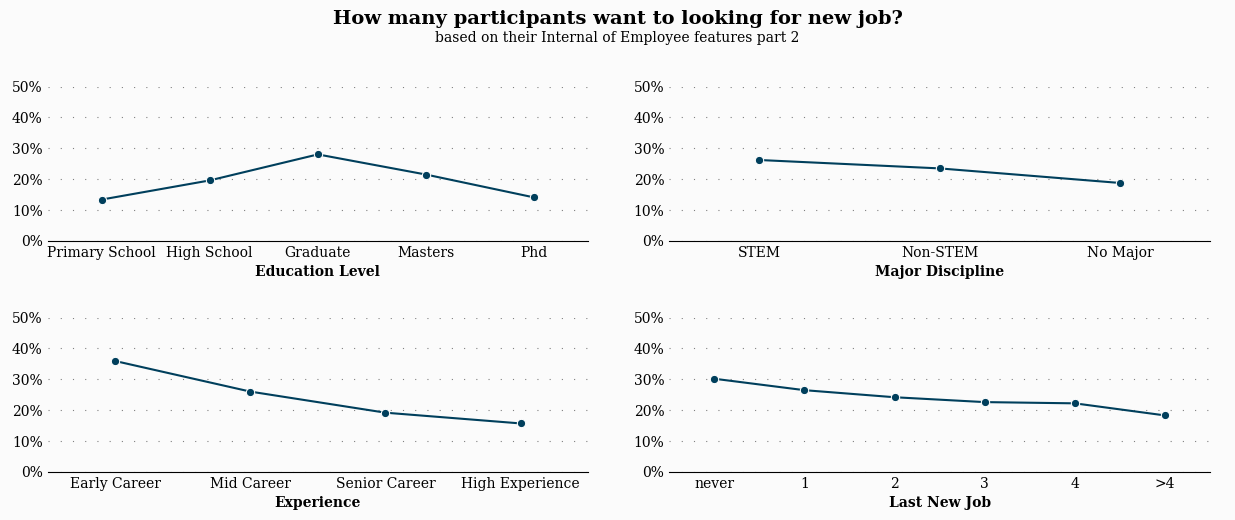

In [31]:
# lineplot for internal of employee part 2
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.15, hspace=0.5)

axtext = fig.add_subplot(gs[0, :])
ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[2, 1])

# ax0 - Education Level
dfp = df[[internal[3],'target']].pivot_table(index=internal[3], columns='target', aggfunc=len).reset_index().rename(columns={0:'Not Looking for Job Change', 1:'Looking for Job Change'})
dfp['Total'] = dfp['Looking for Job Change'] + dfp['Not Looking for Job Change']
dfp['Looking for Job Change Percentage'] = dfp['Looking for Job Change'] / dfp['Total'] * 100
dfp = dfp.set_index(internal[3]).loc[['Primary School','High School','Graduate','Masters','Phd']].reset_index()

ax0 = sns.lineplot(data=dfp, x=internal[3], y='Looking for Job Change Percentage', marker='o', color=blue, ax=ax0)
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax0.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax0.set_xlabel('Education Level', size=10, weight='bold')
ax0.set_ylabel('')
ax0.set_ylim(0,50)
ax0.set_xlim(-0.5,4.5)

# ax1 - Major Discipline
dfp = df[[internal[4],'target']].pivot_table(index=internal[4], columns='target', aggfunc=len).reset_index().rename(columns={0:'Not Looking for Job Change', 1:'Looking for Job Change'})
dfp['Total'] = dfp['Looking for Job Change'] + dfp['Not Looking for Job Change']
dfp['Looking for Job Change Percentage'] = dfp['Looking for Job Change'] / dfp['Total'] * 100
dfp = dfp.set_index(internal[4]).loc[['STEM','Non-STEM','No Major']].reset_index()

ax1 = sns.lineplot(data=dfp, x=internal[4], y='Looking for Job Change Percentage', marker='o', color=blue, ax=ax1)
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax1.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax1.set_xlabel('Major Discipline', size=10, weight='bold')
ax1.set_ylabel('')
ax1.set_ylim(0,50)
ax1.set_xlim(-0.5,2.5)

# ax2 - Experience
dfp = df[[internal[5],'target']].pivot_table(index=internal[5], columns='target', aggfunc=len).reset_index().rename(columns={0:'Not Looking for Job Change', 1:'Looking for Job Change'})
dfp['Total'] = dfp['Looking for Job Change'] + dfp['Not Looking for Job Change']
dfp['Looking for Job Change Percentage'] = dfp['Looking for Job Change'] / dfp['Total'] * 100
dfp = dfp.set_index(internal[5]).loc[['Early Career','Mid Career','Senior Career','High Experience']].reset_index()

ax2 = sns.lineplot(data=dfp, x=internal[5], y='Looking for Job Change Percentage', marker='o', color=blue, ax=ax2)
ax2.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax2.set_xlabel('Experience', size=10, weight='bold')
ax2.set_ylabel('')
ax2.set_ylim(0,50)
ax2.set_xlim(-0.5,3.5)

# ax3 - Last New Job
dfp = df[[internal[6],'target']].pivot_table(index=internal[6], columns='target', aggfunc=len).reset_index().rename(columns={0:'Not Looking for Job Change', 1:'Looking for Job Change'})
dfp['Total'] = dfp['Looking for Job Change'] + dfp['Not Looking for Job Change']
dfp['Looking for Job Change Percentage'] = dfp['Looking for Job Change'] / dfp['Total'] * 100
dfp = dfp.set_index(internal[6]).loc[['never','1','2','3','4','>4']].reset_index()

ax3 = sns.lineplot(data=dfp, x=internal[6], y='Looking for Job Change Percentage', marker='o', color=blue, ax=ax3)
ax3.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax3.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax3.set_xlabel('Last New Job', size=10, weight='bold')
ax3.set_ylabel('')
ax3.set_ylim(0,50)
ax3.set_xlim(-0.5,5.5)

# axtext - Title
axtext.text(0.5, 1, 'How many participants want to looking for new job?', size=14, weight='bold', horizontalalignment = 'center')
axtext.text(0.5, 0.77, 'based on their Internal of Employee features part 2', size=10, horizontalalignment = 'center')
axtext.axis('off')
axtext.set_position([0.1, 0.57, 0.81, 0.1])    

Notes:<br/>
1. People with graduate major tend to leave company after courses. It makes sense since people with lower education level think that it is still hard to look for new job and people with higher education level already work in better situation.
2. People that loyal to company tend to stay in company after courses. Its reasons speak itself.
3. People that have higher experience tend to stay in company after courses. It is because they already work in better situation or they want to retire in that company because they are older.
4. There is no visible correlation between major discipline with target. We can leave it for now.

### Training Hours

We make some hypothesis for correlation between features and training hours:<br/>
1. People with relevant experience in data science tend to have faster training hours
2. People who pursue learning tend to have slower training hours
3. People with STEM major tend to have faster training hours
4. People with higher education level tend to have faster training hours

We want to prove our hypothesis with visualization data

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

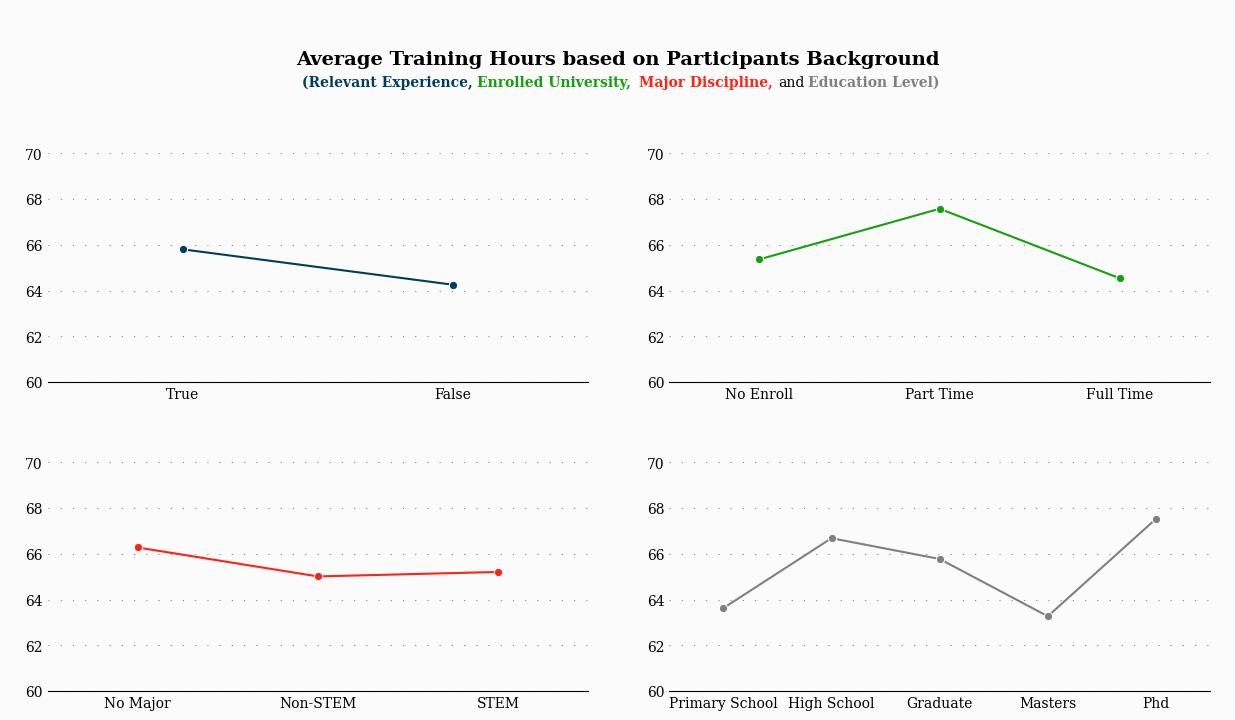

In [32]:
fig = plt.figure(figsize=(15,11))
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.15, hspace=0.35)

ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[2, 1])
axtext = fig.add_subplot(gs[0, :])

# ax0 - Count Plot - Relevent Experience
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
dfg = df.groupby('relevant_experience')['training_hours'].mean().reset_index().set_index('relevant_experience').loc[['True','False']].reset_index()
sns.lineplot(data=dfg, x='relevant_experience', y='training_hours', ax=ax0, marker='o', color=blue)

ax0.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax0.set_ylabel('')
ax0.set_xlabel('')
ax0.set_ylim(60,70)
ax0.set_xlim(-0.5,1.5)

# ax1 - Count Plot - Enrolled University
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
dfg = df.groupby('enrolled_university')['training_hours'].mean().reset_index().set_index('enrolled_university').loc[['No Enroll','Part Time','Full Time']].reset_index()
sns.lineplot(data=dfg, x='enrolled_university', y='training_hours', ax=ax1, marker='o', color=green)

ax1.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylim(60,70)
ax1.set_xlim(-0.5,2.5)
# ax1.set_yticklabels([])

# ax2 - Count Plot - Major Discipline
ax2.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
dfg = df.groupby('major_discipline')['training_hours'].mean().reset_index().set_index('major_discipline').loc[['No Major','Non-STEM','STEM']].reset_index()
sns.lineplot(data=dfg, x='major_discipline', y='training_hours', ax=ax2, marker='o', color=red)

ax2.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylim(60,70)
ax2.set_xlim(-0.5,2.5)

# ax3 - Count Plot - Education Level
ax3.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))
dfg = df.groupby('education_level')['training_hours'].mean().reset_index().set_index('education_level').loc[['Primary School','High School','Graduate','Masters','Phd']].reset_index()
sns.lineplot(data=dfg, x='education_level', y='training_hours', ax=ax3, marker='o', color=gray)

ax3.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.set_ylim(60,70)
ax3.set_xlim(-0.5,4.5)
# ax3.set_yticklabels([])

# axtext - Text
axtext.text(0.5, 0.5, 'Average Training Hours based on Participants Background', size=14, weight='bold', horizontalalignment = 'center')
axtext.text(0.298+0.013, 0.3, '(Relevant Experience,', color=blue, weight='bold', size=10, horizontalalignment = 'center')
axtext.text(0.435+0.013, 0.3, 'Enrolled University,', color=green, weight='bold', size=10, horizontalalignment = 'center')
axtext.text(0.56+0.013, 0.3, 'Major Discipline,', color=red, weight='bold', size=10, horizontalalignment = 'center')
axtext.text(0.63+0.013, 0.3, 'and', size=10, horizontalalignment = 'center')
axtext.text(0.698+0.013, 0.3, 'Education Level)', color=gray, weight='bold', size=10, horizontalalignment = 'center')
axtext.set_position([0.1, 0.63, 0.81, 0.1])
axtext.axis('off')


After look at the plot above, we see that our hypothesis is almost, if not all, are wrong. It doesn't makes any sense. We still thinking positive that this is maybe because we use mean value when there are many outliers in training hours data. We still try more with quantile. We will grouping training hours to two category, Fast and Slow. Fast is if people training hours is below Q1 of total training hours data, otherwise is slow.

In [33]:
# check quantile and mean of training_hours
th = df['training_hours']
print(f"Total of training_hours below Q1 ({th.quantile(0.25)} hours): {th[th < th.quantile(0.25)].shape[0]} data or {th[th < th.quantile(0.25)].shape[0]/df.shape[0]*100:.2f}%")
print(f"Total of training_hours below Q2 ({th.quantile(0.5)} hours): {th[th < th.quantile(0.5)].shape[0]} data or {th[th < th.quantile(0.5)].shape[0]/df.shape[0]*100:.2f}%")
print(f"Total of training_hours below Q3 ({th.quantile(0.75)} hours): {th[th < th.quantile(0.75)].shape[0]} data or {th[th < th.quantile(0.75)].shape[0]/df.shape[0]*100:.2f}%")
print(f"Total of training_hours below mean ({th.mean():.2f} hours): {th[th < th.mean()].shape[0]} data or {th[th < th.mean()].shape[0]/df.shape[0]*100:.2f}%")


Total of training_hours below Q1 (23.0 hours): 4665 data or 24.35%
Total of training_hours below Q2 (47.0 hours): 9472 data or 49.44%
Total of training_hours below Q3 (88.0 hours): 14285 data or 74.56%
Total of training_hours below mean (65.37 hours): 12234 data or 63.86%


In [34]:
# grouping training_hours
slow_treshold = df['training_hours'].quantile(0.25)

df['training_hours'] = df['training_hours'].apply(lambda x: "Fast" if x < slow_treshold
                                                  else pd.NA if pd.isna(x) else "Slow")

df.sample(10)

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
9297,7649,city_158,0.7-0.8,Male,True,Full Time,Graduate,STEM,Early Career,Small,Pvt Ltd,2,Slow,True
9291,27185,city_103,0.9-1.0,Male,True,No Enroll,Graduate,STEM,Senior Career,NaN,NaN,2,Slow,True
6522,24203,city_21,0.6-0.7,NaN,True,No Enroll,Masters,STEM,Mid Career,Small,Pvt Ltd,>4,Fast,True
11459,16267,city_160,0.9-1.0,NaN,False,No Enroll,High School,No Major,Early Career,NaN,NaN,never,Fast,False
7154,12268,city_7,0.6-0.7,NaN,False,Full Time,Graduate,STEM,Senior Career,NaN,NaN,2,Slow,True
10427,17196,city_65,0.8-0.9,Male,True,No Enroll,High School,No Major,Mid Career,Large,Pvt Ltd,1,Fast,False
3966,15067,city_136,0.8-0.9,NaN,True,Full Time,Graduate,STEM,Mid Career,Small,Early Startup,2,Fast,False
13337,28933,city_21,0.6-0.7,Male,True,Full Time,Masters,STEM,Mid Career,Small,Pvt Ltd,1,Slow,False
13785,29488,city_100,0.8-0.9,Male,True,No Enroll,Graduate,STEM,High Experience,NaN,NaN,>4,Slow,True
14698,26778,city_21,0.6-0.7,Male,True,Full Time,Masters,STEM,Early Career,Small,Pvt Ltd,1,Fast,True


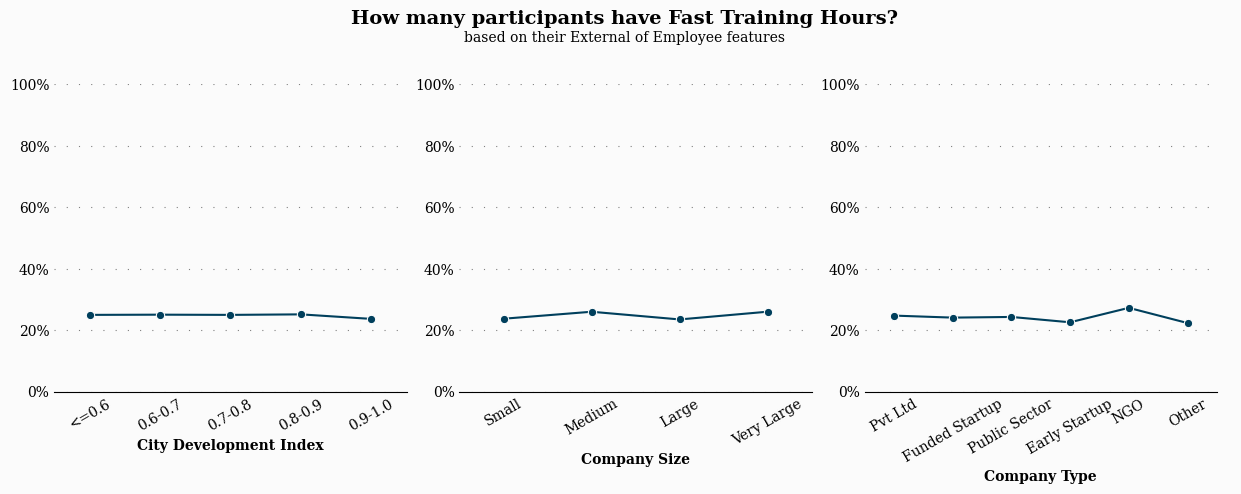

In [35]:
# lineplot for external of employee
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.15, hspace=0.005)

axtext = fig.add_subplot(gs[0, :])
ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[1, 2])

# ax0 - City Development Index
dfp = df[[external[0],'training_hours']].pivot_table(index=external[0], columns='training_hours', aggfunc=len).reset_index().rename(columns={'Fast':'Fast Training Hours','Slow':'Slow Training Hours'})
dfp['Total'] = dfp['Fast Training Hours'] + dfp['Slow Training Hours']
dfp['Fast Training Hours Percentage'] = dfp['Fast Training Hours'] / dfp['Total'] * 100
dfp = dfp.set_index(external[0]).loc[['<=0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1.0']].reset_index()

ax0 = sns.lineplot(data=dfp, x=external[0], y='Fast Training Hours Percentage', marker='o', color=blue, ax=ax0)
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax0.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax0.set_xlabel('City Development Index', size=10, weight='bold')
ax0.set_ylabel('')
ax0.set_ylim(0,100)
ax0.set_xlim(-0.5,4.5)
ax0.set_xticklabels(labels=dfp[external[0]].unique() ,rotation=30)

# ax1 - Company Size
dfp = df[[external[1],'training_hours']].pivot_table(index=external[1], columns='training_hours', aggfunc=len).reset_index().rename(columns={'Fast':'Fast Training Hours','Slow':'Slow Training Hours'})
dfp['Total'] = dfp['Fast Training Hours'] + dfp['Slow Training Hours']
dfp['Fast Training Hours Percentage'] = dfp['Fast Training Hours'] / dfp['Total'] * 100
dfp = dfp.set_index(external[1]).loc[['Small','Medium','Large','Very Large']].reset_index()

ax1 = sns.lineplot(data=dfp, x=external[1], y='Fast Training Hours Percentage', marker='o', color=blue, ax=ax1)
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax1.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax1.set_xlabel('Company Size', size=10, weight='bold')
ax1.set_ylabel('')
ax1.set_ylim(0,100)
ax1.set_xlim(-0.5,3.5)
ax1.set_xticklabels(labels=dfp[external[1]].unique() ,rotation=30)

# ax2 - Company Type
dfp = df[[external[2],'training_hours']].pivot_table(index=external[2], columns='training_hours', aggfunc=len).reset_index().rename(columns={'Fast':'Fast Training Hours','Slow':'Slow Training Hours'})
dfp['Total'] = dfp['Fast Training Hours'] + dfp['Slow Training Hours']
dfp['Fast Training Hours Percentage'] = dfp['Fast Training Hours'] / dfp['Total'] * 100
dfp = dfp.set_index(external[2]).loc[['Pvt Ltd','Funded Startup','Public Sector','Early Startup','NGO','Other']].reset_index()

ax2 = sns.lineplot(data=dfp, x=external[2], y='Fast Training Hours Percentage', marker='o', color=blue, ax=ax2)
ax2.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax2.set_xlabel('Company Type', size=10, weight='bold')
ax2.set_ylabel('')
ax2.set_ylim(0,100)
ax2.set_xlim(-0.5,5.5)
ax2.set_xticklabels(labels=dfp[external[2]].unique() ,rotation=30)

# axtext - Title
axtext.text(0.5, 1, 'How many participants have Fast Training Hours?', size=14, weight='bold', horizontalalignment = 'center')
axtext.text(0.5, 0.77, 'based on their External of Employee features', size=10, horizontalalignment = 'center')
axtext.axis('off')
axtext.set_position([0.1, 0.47, 0.81, 0.1])

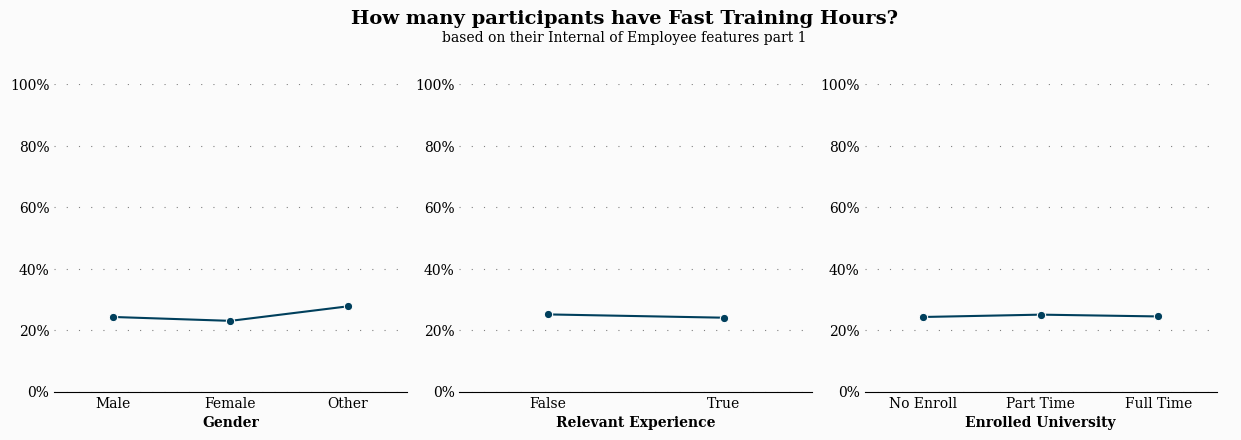

In [36]:
# lineplot for internal of employee part 1
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.15, hspace=0.005)

axtext = fig.add_subplot(gs[0, :])
ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[1, 2])

# ax0 - Gender
dfp = df[[internal[0],'training_hours']].pivot_table(index=internal[0], columns='training_hours', aggfunc=len).reset_index().rename(columns={'Fast':'Fast Training Hours','Slow':'Slow Training Hours'})
dfp['Total'] = dfp['Fast Training Hours'] + dfp['Slow Training Hours']
dfp['Fast Training Hours Percentage'] = dfp['Fast Training Hours'] / dfp['Total'] * 100
dfp = dfp.set_index(internal[0]).loc[['Male','Female','Other']].reset_index()

ax0 = sns.lineplot(data=dfp, x=internal[0], y='Fast Training Hours Percentage', marker='o', color=blue, ax=ax0)
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax0.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax0.set_xlabel('Gender', size=10, weight='bold')
ax0.set_ylabel('')
ax0.set_ylim(0,100)
ax0.set_xlim(-0.5,2.5)

# ax1 - Relevant Experience
dfp = df[[internal[1],'training_hours']].pivot_table(index=internal[1], columns='training_hours', aggfunc=len).reset_index().rename(columns={'Fast':'Fast Training Hours','Slow':'Slow Training Hours'})
dfp['Total'] = dfp['Fast Training Hours'] + dfp['Slow Training Hours']
dfp['Fast Training Hours Percentage'] = dfp['Fast Training Hours'] / dfp['Total'] * 100
# dfp = dfp.set_index(internal[1]).loc[[True,False]].reset_index()

ax1 = sns.lineplot(data=dfp, x=internal[1], y='Fast Training Hours Percentage', marker='o', color=blue, ax=ax1)
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax1.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax1.set_xlabel('Relevant Experience', size=10, weight='bold')
ax1.set_ylabel('')
ax1.set_ylim(0,100)
ax1.set_xlim(-0.5,1.5)

# ax2 - Enrolled University
dfp = df[[internal[2],'training_hours']].pivot_table(index=internal[2], columns='training_hours', aggfunc=len).reset_index().rename(columns={'Fast':'Fast Training Hours','Slow':'Slow Training Hours'})
dfp['Total'] = dfp['Fast Training Hours'] + dfp['Slow Training Hours']
dfp['Fast Training Hours Percentage'] = dfp['Fast Training Hours'] / dfp['Total'] * 100
dfp = dfp.set_index(internal[2]).loc[['No Enroll','Part Time','Full Time']].reset_index()

ax2 = sns.lineplot(data=dfp, x=internal[2], y='Fast Training Hours Percentage', marker='o', color=blue, ax=ax2)
ax2.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax2.set_xlabel('Enrolled University', size=10, weight='bold')
ax2.set_ylabel('')
ax2.set_ylim(0,100)
ax2.set_xlim(-0.5,2.5)

# axtext - Title
axtext.text(0.5, 1, 'How many participants have Fast Training Hours?', size=14, weight='bold', horizontalalignment = 'center')
axtext.text(0.5, 0.77, 'based on their Internal of Employee features part 1', size=10, horizontalalignment = 'center')
axtext.axis('off')
axtext.set_position([0.1, 0.47, 0.81, 0.1])

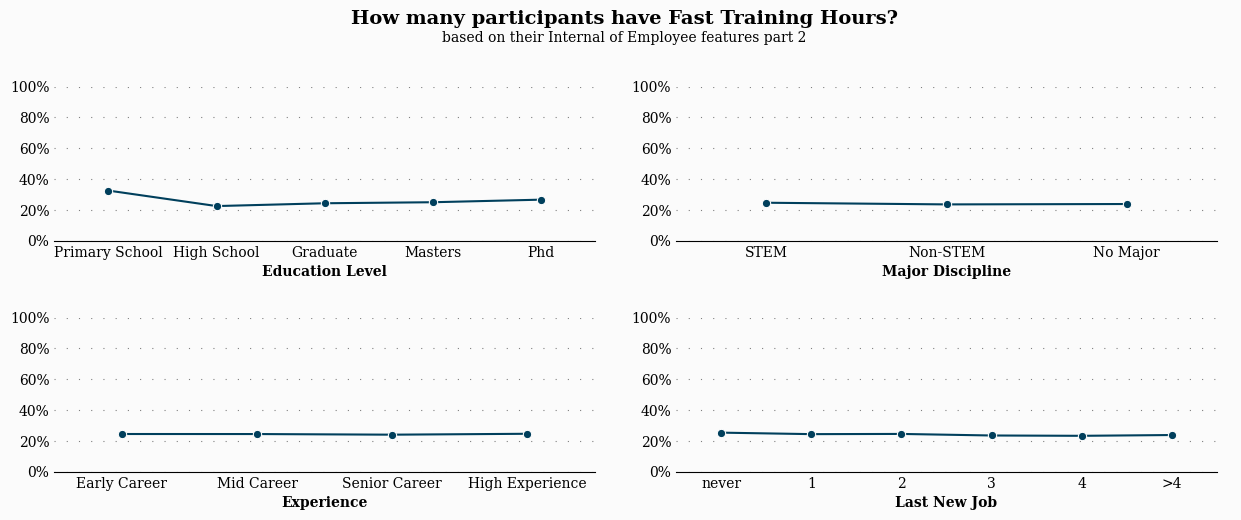

In [37]:
# lineplot for internal of employee part 2
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.15, hspace=0.5)

axtext = fig.add_subplot(gs[0, :])
ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[2, 1])

# ax0 - Education Level
dfp = df[[internal[3],'training_hours']].pivot_table(index=internal[3], columns='training_hours', aggfunc=len).reset_index().rename(columns={'Fast':'Fast Training Hours','Slow':'Slow Training Hours'})
dfp['Total'] = dfp['Fast Training Hours'] + dfp['Slow Training Hours']
dfp['Fast Training Hours Percentage'] = dfp['Fast Training Hours'] / dfp['Total'] * 100
dfp = dfp.set_index(internal[3]).loc[['Primary School','High School','Graduate','Masters','Phd']].reset_index()

ax0 = sns.lineplot(data=dfp, x=internal[3], y='Fast Training Hours Percentage', marker='o', color=blue, ax=ax0)
ax0.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax0.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax0.set_xlabel('Education Level', size=10, weight='bold')
ax0.set_ylabel('')
ax0.set_ylim(0,100)
ax0.set_xlim(-0.5,4.5)

# ax1 - Major Discipline
dfp = df[[internal[4],'training_hours']].pivot_table(index=internal[4], columns='training_hours', aggfunc=len).reset_index().rename(columns={'Fast':'Fast Training Hours','Slow':'Slow Training Hours'})
dfp['Total'] = dfp['Fast Training Hours'] + dfp['Slow Training Hours']
dfp['Fast Training Hours Percentage'] = dfp['Fast Training Hours'] / dfp['Total'] * 100
dfp = dfp.set_index(internal[4]).loc[['STEM','Non-STEM','No Major']].reset_index()

ax1 = sns.lineplot(data=dfp, x=internal[4], y='Fast Training Hours Percentage', marker='o', color=blue, ax=ax1)
ax1.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax1.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax1.set_xlabel('Major Discipline', size=10, weight='bold')
ax1.set_ylabel('')
ax1.set_ylim(0,100)
ax1.set_xlim(-0.5,2.5)

# ax2 - Experience
dfp = df[[internal[5],'training_hours']].pivot_table(index=internal[5], columns='training_hours', aggfunc=len).reset_index().rename(columns={'Fast':'Fast Training Hours','Slow':'Slow Training Hours'})
dfp['Total'] = dfp['Fast Training Hours'] + dfp['Slow Training Hours']
dfp['Fast Training Hours Percentage'] = dfp['Fast Training Hours'] / dfp['Total'] * 100
dfp = dfp.set_index(internal[5]).loc[['Early Career','Mid Career','Senior Career','High Experience']].reset_index()

ax2 = sns.lineplot(data=dfp, x=internal[5], y='Fast Training Hours Percentage', marker='o', color=blue, ax=ax2)
ax2.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax2.set_xlabel('Experience', size=10, weight='bold')
ax2.set_ylabel('')
ax2.set_ylim(0,100)
ax2.set_xlim(-0.5,3.5)

# ax3 - Last New Job
dfp = df[[internal[6],'training_hours']].pivot_table(index=internal[6], columns='training_hours', aggfunc=len).reset_index().rename(columns={'Fast':'Fast Training Hours','Slow':'Slow Training Hours'})
dfp['Total'] = dfp['Fast Training Hours'] + dfp['Slow Training Hours']
dfp['Fast Training Hours Percentage'] = dfp['Fast Training Hours'] / dfp['Total'] * 100
dfp = dfp.set_index(internal[6]).loc[['never','1','2','3','4','>4']].reset_index()

ax3 = sns.lineplot(data=dfp, x=internal[6], y='Fast Training Hours Percentage', marker='o', color=blue, ax=ax3)
ax3.grid(color='gray', ls=':', axis='y', zorder=0, dashes=(1,10))

ax3.yaxis.set_major_formatter(mtick.FuncFormatter(percentage_formatter))
ax3.set_xlabel('Last New Job', size=10, weight='bold')
ax3.set_ylabel('')
ax3.set_ylim(0,100)
ax3.set_xlim(-0.5,5.5)

# axtext - Title
axtext.text(0.5, 1, 'How many participants have Fast Training Hours?', size=14, weight='bold', horizontalalignment = 'center')
axtext.text(0.5, 0.77, 'based on their Internal of Employee features part 2', size=10, horizontalalignment = 'center')
axtext.axis('off')
axtext.set_position([0.1, 0.57, 0.81, 0.1])

In [38]:
# make pivot table for target vs training_hours
dfp = df[['target','training_hours']].pivot_table(index='target', columns='training_hours', aggfunc=len).reset_index().rename(columns={'Fast':'Fast Training Hours','Slow':'Slow Training Hours'})
dfp['Total'] = dfp['Fast Training Hours'] + dfp['Slow Training Hours']
dfp['Fast Training Hours Percentage'] = dfp['Fast Training Hours'] / dfp['Total'] * 100
display(dfp)
print("Percentage of fast training hours for looking for job change or not is same, it shows that training hours is not a factor for looking for job change")

training_hours,target,Fast Training Hours,Slow Training Hours,Total,Fast Training Hours Percentage
0,False,3498,10883,14381,24.323761
1,True,1167,3610,4777,24.429558


Percentage of fast training hours for looking for job change or not is same, it shows that training hours is not a factor for looking for job change


In [39]:
# make pivot table for training_hours vs target
dfp = df[['training_hours','target']].pivot_table(index='training_hours', columns='target', aggfunc=len).reset_index().rename(columns={0:'Not Looking for Job Change', 1:'Looking for Job Change'})
dfp['Total'] = dfp['Looking for Job Change'] + dfp['Not Looking for Job Change']
dfp['Looking for Job Change Percentage'] = dfp['Looking for Job Change'] / dfp['Total'] * 100
display(dfp)
print("Percentage of looking for job change for fast training hours or slow training hours is same, it shows that target is not a factor for training hours")

target,training_hours,Not Looking for Job Change,Looking for Job Change,Total,Looking for Job Change Percentage
0,Fast,3498,1167,4665,25.016077
1,Slow,10883,3610,14493,24.908577


Percentage of looking for job change for fast training hours or slow training hours is same, it shows that target is not a factor for training hours


In [40]:
# check independence of training_hours and target
contingency_table = pd.crosstab(df['training_hours'], df['target'])
res = stats.chi2_contingency(contingency_table)

# interpret p-value
alpha = 0.05
print("p value is " + str(res.pvalue))
if res.pvalue < alpha:
    print("Reject the null hypothesis (H0). There is a significant association between training_hours and target.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant association between training_hours and target.")

p value is 0.8980250221230404
Fail to reject the null hypothesis (H0). There is no significant association between training_hours and target.


Based on those plots, tables, or even testing, we can see that training hours doesn't have any correlation with another features or even target. We think this is because this dataset is not from real world, but artificially generated. Because of that, we think it is wise to drop training_hours column and not use it, either as feature or target. We will drop training_hours as feature to predict target because we think it doesn't makes any sense if company need to provide training_hours data when they still checking which employee will get the courses. We need to change the objective of this problem for further stage.

# Conclusion

1. We will remove objective of predict training_hours using ML models since there are no correlation between training_hours to other features
2. We will using about 10 categorical columns (15 or 16 features) for ML models to predict target, they are 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job'
3. We will handling missing value using LGBM Classifier and handling imbalance dataset using SMOTE
4. Employee who tend to leave from company after data science courses are: work in lower city development index, not have relevant experience in data science, enroll in university, graduate as education level, lower experience of working, and lower years in current company

# Business Insight

1. Since employee who tend to leave from company after data science courses are work in lower city development index, we suggest to Ascencio for searching client or company from higher city development index (0.8-1 CDI). It is becauses Ascencio can persuade client more easily since their employee unlikely leave the company.
2. For choosing participant of data science courses, Ascencio should choose employee that have relevant experience in data science, not enroll in university as part time or full time, have lower or higher education level (primary school or phd), higher experience working (11 years or above), and higher years in current company (4 years or more).
3. Because we target employee that have higher experience working and higher years in current company, Ascencio need to make curriculum of data science with focus that can easily learn by people with age of 30-50 years old.
4. Employee with STEM major or employee that have relevant experience in data science usually take this data science courses, Ascencio can make curriculum of data science that will more focus in business knowledge than math or programming.